In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import graphviz
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
matplotlib.rc("font", family = "Malgun Gothic")
from sklearn.ensemble import RandomForestRegressor

In [32]:
df_raw = pd.read_csv("체질검사.csv")
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [33]:
#결측치 확인
df_raw.isnull().sum()

FAT        0
AGE        0
WEIGHT     0
HEIGHT     0
NECK       0
CHEST      0
ABDOMEN    0
HIP        0
THIGH      0
KNEE       0
ANKLE      0
BICEPS     0
FOREARM    0
WRIST      0
dtype: int64

In [13]:
#변수변환(HEIGHT, WEIGHT) + BMI추가
df_raw['HEIGHT'] = df_raw['HEIGHT'] * 2.54
df_raw['WEIGHT'] = df_raw['WEIGHT'] * 0.45
df_raw['BMI'] = df_raw["HEIGHT"]**2 / df_raw["WEIGHT"]
df_raw['HEIGHT'] = df_raw['HEIGHT'].round(1)
df_raw['WEIGHT'] = df_raw['WEIGHT'].round(1)
df_raw['BMI'] = df_raw['BMI'].round(1)

In [14]:
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,163.4,183.5,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,206.1
1,11.8,27,75.6,181.0,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,433.2
2,22.2,69,80.0,174.0,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,378.5
3,10.6,57,66.5,167.0,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,419.5
4,47.5,51,98.6,162.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,268.1


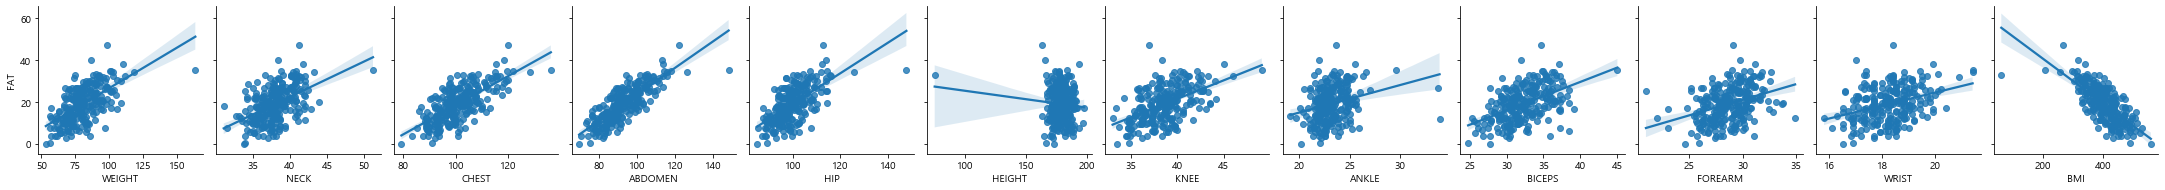

In [15]:
#그래프 분석
sns.pairplot(df_raw, y_vars = "FAT", x_vars = ["WEIGHT", "NECK", "CHEST", "ABDOMEN", "HIP", "HEIGHT", "KNEE", "ANKLE", "BICEPS", "FOREARM", "WRIST", "BMI"], kind = "reg")

## 그래프 분석 결과 전반적으로 상관관계를 보이나 HEIGHT, FOREARM, WRIST는 상관관계를 보이지 않는다고 할 수 있다.

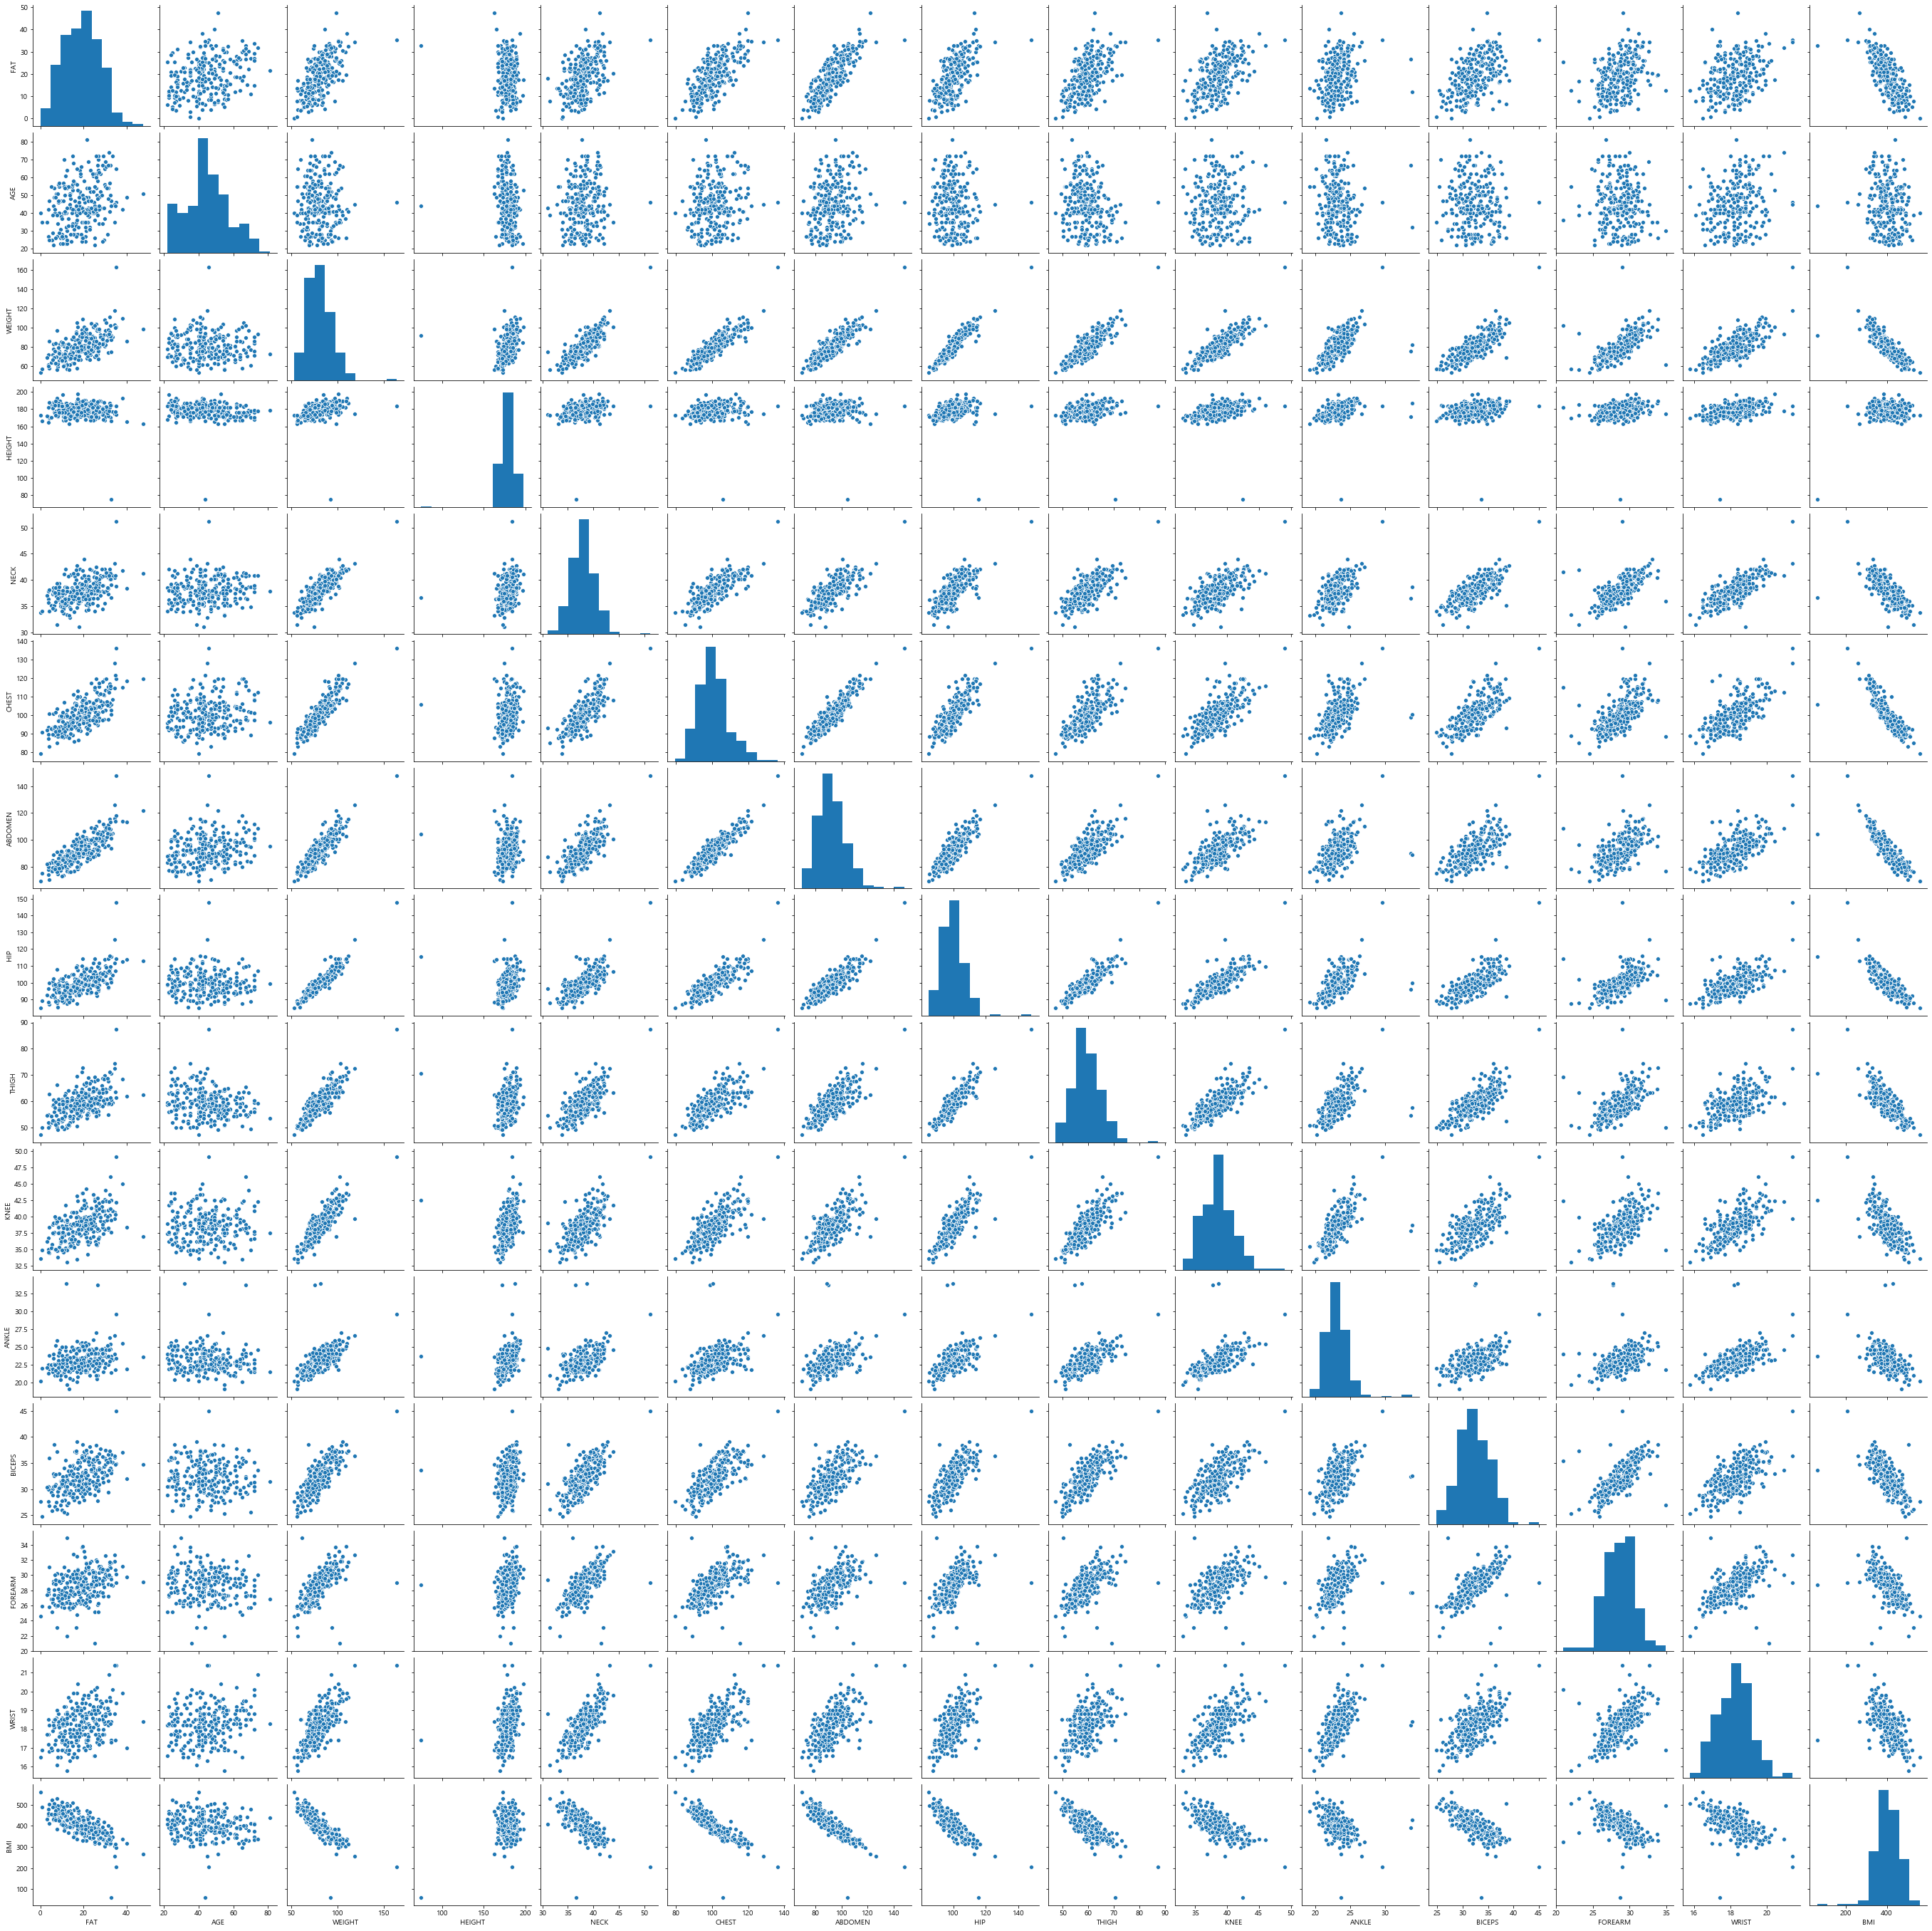

In [16]:
sns.pairplot(df_raw)

In [17]:
df_raw.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.291,0.613,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347,-0.725
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214,-0.115
WEIGHT,0.613,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.801,0.630,0.730,-0.824
HEIGHT,-0.089,-0.172,0.308,1.000,0.253,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322,0.226
NECK,0.491,0.114,0.831,0.253,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745,-0.709
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660,-0.855
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620,-0.864
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630,-0.832
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559,-0.798
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665,-0.706


### FAT 행을 보면 WEIGHT, CHEST, ABDOMEN, HIP, THIGH, KNEE, BMI 가 모두 절대값이 0.5보다 크기 때문에 어느정도 상관관계가 있다고 볼 수 있다. 이를 통해 회귀분석 식을 도출할 수 있다.

In [18]:
reg_model = smf.ols(formula = "FAT ~ WEIGHT + CHEST + ABDOMEN + HIP + THIGH + KNEE + BMI", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     95.90
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           2.12e-66
Time:                        06:37:08   Log-Likelihood:                -725.86
No. Observations:                 252   AIC:                             1468.
Df Residuals:                     244   BIC:                             1496.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.3820     17.048     -0.785      0.4

### 회귀식 도출 결과: y = -13.3820 -0.33x1 + -0.08x2 + 0.95x3 + 0.16x4 + 0.06x5 - 0.03x6

### 결정계수 값이 73%로 설명력이 어느정도 된다고 할 수 있다. 또한 F값의 p-value가 매우 작으므로 유의수주 5%하에서 귀무가설을 기각할 수 있기 때문에 전반적인 모형은 유의하다고 할 수 있다. 그러나 각각의 t값의 p-value를 보면, 유의수준 5% 가정하에 기각할 수 있는 변수는 WEIGHT, ABDOMEN, BMI 뿐이다. 따라서 다중공선성을 의심할 수 있다.

In [19]:
# VIF 검사
df_raw_x = df_raw.drop("FAT", axis =1)
df_raw_x_const = add_constant(df_raw_x)
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values, i)for i in range(df_raw_x_const.shape[1])]
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
10,ANKLE,1.915
1,AGE,2.251
12,FOREARM,2.396
13,WRIST,3.422
11,BICEPS,3.642
4,NECK,4.327
9,KNEE,4.678
3,HEIGHT,7.193
8,THIGH,8.410
5,CHEST,10.482


### vif 검사 결과 10을 넘는 값은 CHEST, ABDOMEN, HIP, BMI, WEIGHT 임을 알 수 있다. 따라서 어느 정도 회귀식의 변화가 필요하다.

In [22]:
df_raw_x = df_raw.drop(["FAT", "WEIGHT"], axis =1)
df_raw_x_const = add_constant(df_raw_x)
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values, i)for i in range(df_raw_x_const.shape[1])]
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
9,ANKLE,1.869
1,AGE,2.173
11,FOREARM,2.377
12,WRIST,3.393
10,BICEPS,3.570
3,NECK,3.991
8,KNEE,4.496
2,HEIGHT,5.365
7,THIGH,8.394
4,CHEST,9.780


In [24]:
reg_model = smf.ols(formula = "FAT ~  ABDOMEN + HIP + BMI", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     196.4
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           3.22e-65
Time:                        06:52:03   Log-Likelihood:                -739.15
No. Observations:                 252   AIC:                             1486.
Df Residuals:                     248   BIC:                             1500.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6831     11.042      0.968      0.3

### 수정된 회귀분석 결과 결정계수는 70%로 하락했지만, F통계량과 각 변수의 t통계량이 모두 유의수준 5% 가정하에서 유의하다고 할 수 있다.

C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


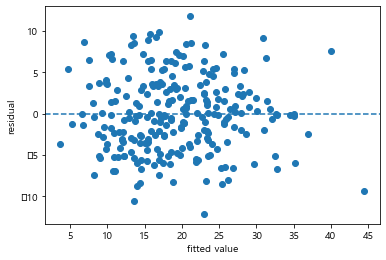

In [25]:
# 잔차 산점도: X-예측값, Y-잔차)
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")


### 잔차 분석 결과 모두 랜덤하게 분포되어 있으므로 등분산성이 성립한다고 할 수 있다.

C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


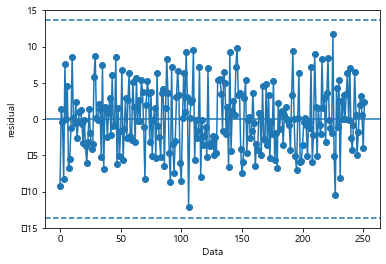

In [27]:
# 잔차의 독립성 확인
plt.plot(df_raw.index, reg_result.resid, marker="o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "-")
plt.axhline(y = 3*np.std(reg_result.resid), linestyle = "--")
plt.axhline(y = -3*np.std(reg_result.resid), linestyle = "--")

### 잔차 독립성 분석 결과 모두 상한선과 하한선 내에 있으므로 독립성이 있다고 할 수 있다.

NormaltestResult(statistic=4.429854805812522, pvalue=0.10916143876401481)

C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


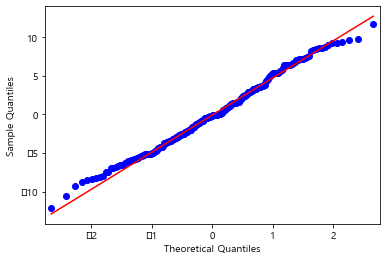

In [28]:
# 잔차 정규성 검정:Q-Q plot. s-standardized line (교재에는 없음)
qqplot(reg_result.resid, line = "q")
from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis=0)


### 정규성 검정 결과 분포가 일차함수에 근사한다고 할 수 있기에 정규성이 존재한다고 할 수 있다.

In [29]:
reg_model = smf.ols(formula = "FAT ~  ABDOMEN + HIP + BMI", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     196.4
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           3.22e-65
Time:                        06:59:09   Log-Likelihood:                -739.15
No. Observations:                 252   AIC:                             1486.
Df Residuals:                     248   BIC:                             1500.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6831     11.042      0.968      0.3

## 회귀식: y = 10.6831 + 0.78x1 - 0.51x2 - 0.03x3

### 최종 회귀식은 위와 같고, FAT에 영향을 주는 변수는 ABDOMEN, HIP, BMI라고 할 수 있다.

In [34]:
df_raw = pd.read_csv("Concrete.csv")
df_raw.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [35]:
#결측치 확인
df_raw.isnull().sum()

CEMENT                           0
BLAST_FURNACE_SLAG               0
FLY_ASH                          0
WATER                            0
SUPERPLASTICIZER                 0
COARSE_AGGREGATE                 0
FINE_AGGREGATE                   0
AGE                              0
CONCRETE_COMPRESSIVE_STRENGTH    0
dtype: int64

In [36]:
#데이터 구성
df_y = df_raw["CONCRETE_COMPRESSIVE_STRENGTH"]
df_x = df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, train_size = 0.7, test_size = 0.3, random_state = 1234)

In [37]:
#모델 생성
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)
print("Scoring on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Scoring on training set: 0.997
Scoring on test set: 0.833


## 모델 설명력은 train 99.7%, test 83.3%로 괜찮다고 할 수 있다.

In [39]:
#파라미터 조정
train_score = []; test_score = []
para_leaf = [n_leaf*1for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234,
                                min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf["MinSampleLeaf"] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,1,0.997,0.833
1,2,0.978,0.830
2,3,0.959,0.811
3,4,0.938,0.807
4,5,0.922,0.797
5,6,0.911,0.797
6,7,0.898,0.810
7,8,0.889,0.791
8,9,0.882,0.797
9,10,0.868,0.791


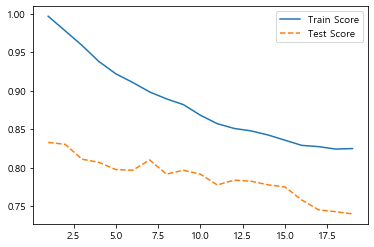

In [40]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.legend()

### 모델 설명력은 횟수를 거듭할 수록 줄어들기 때문에 기본값이 가장 좋다.

In [42]:
train_score = []; test_score = []
para_split = [n_split*2for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 1234,
                                min_samples_leaf = 1 ,
                                min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split["MinSampleLeaf"] = para_split
df_score_split['TrainScore'] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,4,0.990,0.835
1,6,0.981,0.835
2,8,0.969,0.827
3,10,0.963,0.827
4,12,0.956,0.832
5,14,0.945,0.841
6,16,0.936,0.835
7,18,0.924,0.816
8,20,0.908,0.804
9,22,0.897,0.808


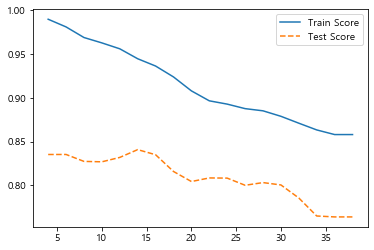

In [43]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.legend()

### train은 떨어지지만 test가 높으므로 14가 가장 좋다.

In [44]:
train_score = []; test_score = []
para_depth = [depth for depth in range(2, 20)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 1234,
                                min_samples_leaf = 1 ,
                                min_samples_split = 14,
                                max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth["MinSampleLeaf"] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,2,0.478,0.495
1,3,0.625,0.597
2,4,0.734,0.683
3,5,0.806,0.747
4,6,0.852,0.775
5,7,0.888,0.802
6,8,0.916,0.809
7,9,0.925,0.823
8,10,0.933,0.833
9,11,0.940,0.841


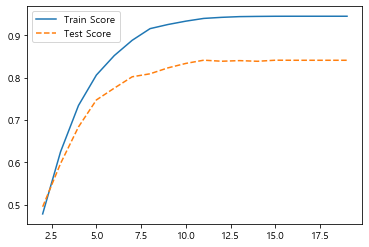

In [45]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()

### train, test 모두 13까지 높아지다 값이 유지되기 때문에 13을 선택한다.

In [46]:
#최종 식
tree_final = DecisionTreeRegressor(min_samples_leaf = 1, min_samples_split = 14, max_depth = 13, random_state = 1234,)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=13,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=14,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

### 리프 1, split 14, depth 13일 때 가장 적절하다.

In [48]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
0,CEMENT,0.359
7,AGE,0.317
3,WATER,0.117
1,BLAST_FURNACE_SLAG,0.093
6,FINE_AGGREGATE,0.038
4,SUPERPLASTICIZER,0.036
5,COARSE_AGGREGATE,0.033
2,FLY_ASH,0.007


Text(0, 0.5, '변수')

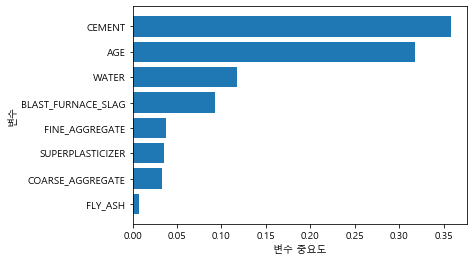

In [49]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

### 변수 중요도는 위의 그래프 처럼 CEMENT, AGE, WATER순이다

In [50]:
tree_final.score(df_train_x, df_train_y)

0.9438697169763466

In [52]:
tree_final.score(df_test_x, df_test_y)

0.8399733884885008

### train 결과 94.3% test 84%로 기본값보다 train은 줄어들었지만 test에서 증가했으므로 더 좋다고 할 수 있다.

In [53]:
rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)
print("Scoring on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Scoring on training set: 0.983
Scoring on test set: 0.911


### 랜덤 포레스트를 사용할 경우 train 98.3%, test  91.1%로 아주 훌륭한 결과를 보인다.

In [54]:
rf_uncustomized

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1234, verbose=0, warm_start=False)

In [55]:
train_score = []; test_score = []
para_n_tree = [n_tree*10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(random_state = 1234,
                                n_estimators = v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.974,0.892
1,20,0.979,0.901
2,30,0.981,0.907
3,40,0.982,0.906
4,50,0.982,0.910
5,60,0.983,0.910
6,70,0.983,0.911
7,80,0.983,0.909
8,90,0.983,0.909
9,100,0.983,0.911


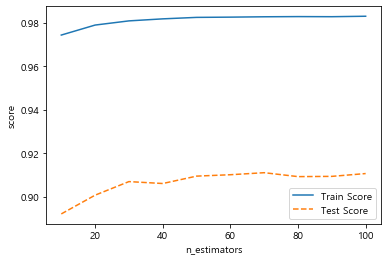

In [56]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

### train과 test 모두 마지막 값인 9에서 가장 높은 값을 보인다.

In [57]:
train_score = []; test_score = []
para_leaf = [n_leaf*1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state = 1234,
                                n_estimators = 100,
                              min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.983,0.911
1,2,0.971,0.907
2,3,0.959,0.901
3,4,0.947,0.894
4,5,0.935,0.885
5,6,0.926,0.878
6,7,0.917,0.872
7,8,0.909,0.865
8,9,0.901,0.860
9,10,0.895,0.854


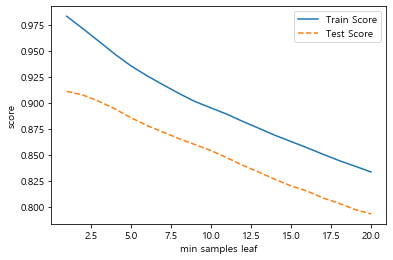

In [58]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

### train과 test 모두 첫째 값 1에서 가장 높은 값을 보인다.

In [60]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state = 1234,
                                min_samples_leaf = 6 ,
                                min_samples_split = 14,
                                max_depth = v_max_depth,
                              n_estimators = 100)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.347,0.342
1,2,0.616,0.605
2,3,0.738,0.714
3,4,0.820,0.785
4,5,0.874,0.840
5,6,0.901,0.862
6,7,0.914,0.871
7,8,0.919,0.874
8,9,0.921,0.875
9,10,0.922,0.876


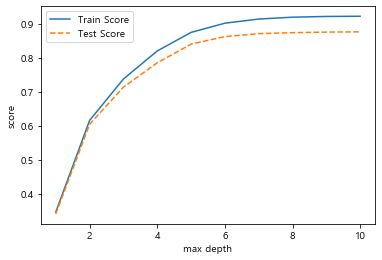

In [61]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

### train과 test 모두 마지막 값인 9에서 가장 높은 값을 보인다

In [62]:
rf_final = RandomForestRegressor(min_samples_leaf = 1, min_samples_split = 9, max_depth = 9, random_state = 1234, n_estimators = 100)
rf_final.fit(df_train_x, df_train_y)
print("Scoring on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Scoring on training set: 0.956
Scoring on test set: 0.894


In [65]:
rf_final = RandomForestRegressor(random_state = 1234)
rf_final.fit(df_train_x, df_train_y)
print("Scoring on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Scoring on training set: 0.983
Scoring on test set: 0.911


### 결과적으로 기본값이 더 좋은 모습을 보이기 때문에 기본 값을 사용하기로 한다.

In [66]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.349
0,CEMENT,0.289
3,WATER,0.111
4,SUPERPLASTICIZER,0.088
1,BLAST_FURNACE_SLAG,0.063
6,FINE_AGGREGATE,0.046
5,COARSE_AGGREGATE,0.035
2,FLY_ASH,0.019


Text(0, 0.5, '변수')

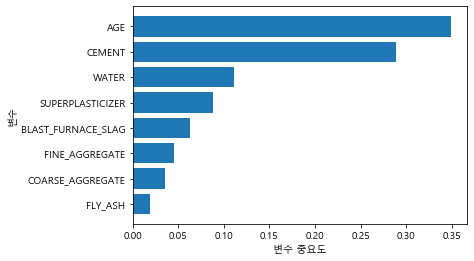

In [67]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

### 랜덤포레스트의 경우 AGE, CEMENT, WATER의 순서로 Decision Tree와는 다른 결과값을 보인다.

In [68]:
rf_final.score(df_train_x, df_train_y)

0.9829428800603957

In [69]:
rf_final.score(df_test_x, df_test_y)

0.9106944945941631